In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.float_format = "{:,.2f}".format

## Emotion Class Assignment And Data Preperation 

In [2]:
df_original = pd.read_json('emotion_hashtags.json')

In [3]:
df_original

,id,text,withheld
0,1509681902466306048,RT @videosofjoy: Feel My Rhythm Dance Practice...,NaN
1,1509681636782526464,RT @JOYFlLES: #JOY: dirty south\nhttps://t.co/...,NaN
2,1509681540573315072,The Self Sufficient / freedom / free speech pa...,NaN
3,1509681451482161152,Find out what your #free #FridayMysteryGift wi...,NaN
4,1509681260314116096,RT @SRDHAIN: Prem Rawat \n\n#PremRawat #peacei...,NaN
...,...,...,...
374198,1509650748610838528,I am currently designing the most beautiful li...,NaN
374199,1509650618444443648,#fear tactics worked on too many. This world i...,NaN
374200,1509650561872064512,"RT @on32ndbeat: Beside money, I need RV to per...",NaN
374201,1509650501037608960,"#Genoa #Surprise, #Coaching, A one on one rela...",NaN


In [4]:
#Dropping unncessary column 
df_original = df_original.drop(columns=['withheld'])


#Transforming to lowercase
df_original['text'] = df_original['text'].str.lower()
df_original

,id,text
0,1509681902466306048,rt @videosofjoy: feel my rhythm dance practice...
1,1509681636782526464,rt @joyflles: #joy: dirty south\nhttps://t.co/...
2,1509681540573315072,the self sufficient / freedom / free speech pa...
3,1509681451482161152,find out what your #free #fridaymysterygift wi...
4,1509681260314116096,rt @srdhain: prem rawat \n\n#premrawat #peacei...
...,...,...
374198,1509650748610838528,i am currently designing the most beautiful li...
374199,1509650618444443648,#fear tactics worked on too many. this world i...
374200,1509650561872064512,"rt @on32ndbeat: beside money, i need rv to per..."
374201,1509650501037608960,"#genoa #surprise, #coaching, a one on one rela..."


In [5]:
#First filter to make sure all entries has at least one of the six emotion hastags 
#in case Twitter filter was not completely accurate

df_first_filter = df_original[df_original['text'].str.contains(r'(?:\s|^)#joy(?:\s|$)|(?:\s|^)#anger(?:\s|$)|(?:\s|^)#fear(?:\s|$)|(?:\s|^)#sadness(?:\s|$)|(?:\s|^)#disgust(?:\s|$)|(?:\s|^)#surprise(?:\s|$)')]
df_first_filter

,id,text
0,1509681902466306048,rt @videosofjoy: feel my rhythm dance practice...
2,1509681540573315072,the self sufficient / freedom / free speech pa...
3,1509681451482161152,find out what your #free #fridaymysterygift wi...
4,1509681260314116096,rt @srdhain: prem rawat \n\n#premrawat #peacei...
7,1509681183038517248,"rt @on32ndbeat: beside money, i need rv to per..."
...,...,...
374196,1509650856739803136,rt @itzjoysoo: post that is gaining attention ...
374198,1509650748610838528,i am currently designing the most beautiful li...
374199,1509650618444443648,#fear tactics worked on too many. this world i...
374200,1509650561872064512,"rt @on32ndbeat: beside money, i need rv to per..."


In [6]:
## getting rid of multiple emotions within single tweet

df_second_filter = df_first_filter[(df_first_filter['text'].str.contains(r'(?:\s|^)#joy(?:\s|$)')) & (df_first_filter['text'].str.contains(r'(?:\s|^)#anger(?:\s|$)')) == False ] 
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#joy(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#fear(?:\s|$)')) == False ]
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#joy(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#sadness(?:\s|$)')) == False ] 
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#joy(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#disgust(?:\s|$)')) == False ] 
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#joy(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#surprise(?:\s|$)')) == False ] 
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#anger(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#fear(?:\s|$)')) == False ] 
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#anger(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#sadness(?:\s|$)')) == False ] 
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#anger(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#disgust(?:\s|$)')) == False ] 
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#anger(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#surprise(?:\s|$)')) == False ] 
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#fear(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#sadness(?:\s|$)')) == False ] 
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#fear(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#disgust(?:\s|$)')) == False ] 
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#fear(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#surprise(?:\s|$)')) == False ] 
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#sadness(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#disgust(?:\s|$)')) == False ] 
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#sadness(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#surprise(?:\s|$)')) == False ] 
df_second_filter = df_second_filter[(df_second_filter['text'].str.contains(r'(?:\s|^)#disgust(?:\s|$)')) & (df_second_filter['text'].str.contains(r'(?:\s|^)#surprise(?:\s|$)')) == False ] 


In [7]:
df_second_filter

,id,text
0,1509681902466306048,rt @videosofjoy: feel my rhythm dance practice...
2,1509681540573315072,the self sufficient / freedom / free speech pa...
3,1509681451482161152,find out what your #free #fridaymysterygift wi...
4,1509681260314116096,rt @srdhain: prem rawat \n\n#premrawat #peacei...
7,1509681183038517248,"rt @on32ndbeat: beside money, i need rv to per..."
...,...,...
374196,1509650856739803136,rt @itzjoysoo: post that is gaining attention ...
374198,1509650748610838528,i am currently designing the most beautiful li...
374199,1509650618444443648,#fear tactics worked on too many. this world i...
374200,1509650561872064512,"rt @on32ndbeat: beside money, i need rv to per..."


In [8]:
### emotion class assignment

df_second_filter_class = df_second_filter
df_second_filter_class["emo_class"] = np.nan

for index, row in df_second_filter_class.iterrows():
    if re.search((r'(?:\s|^)#joy(?:\s|$)'), row["text"]):
        df_second_filter_class.loc[index, "emo_class"] = 1 #joy class
        
    elif re.search((r'(?:\s|^)#anger(?:\s|$)'), row["text"]):
        df_second_filter_class.loc[index, "emo_class"] = 2 #anger class
        
    elif re.search((r'(?:\s|^)#fear(?:\s|$)'), row["text"]):
        df_second_filter_class.loc[index, "emo_class"] = 3 #fear class
        
    elif re.search((r'(?:\s|^)#sadness(?:\s|$)'), row["text"]):
        df_second_filter_class.loc[index, "emo_class"] = 4 #sadness class
        
    elif re.search((r'(?:\s|^)#disgust(?:\s|$)'), row["text"]):
        df_second_filter_class.loc[index, "emo_class"] = 5 #disgust class
        
    elif re.search((r'(?:\s|^)#surprise(?:\s|$)'), row["text"]):
        df_second_filter_class.loc[index, "emo_class"] = 6 #surprise class

In [9]:
 df_second_filter_class.groupby("emo_class").count()

,id,text
emo_class,,
1.00,204192,204192
2.00,6318,6318
3.00,19113,19113
4.00,3234,3234
5.00,484,484
6.00,24184,24184


In [10]:
##  Further data cleaning


def data_clean_except_lowercase(df_function):

    ## Getting rid of RT in front of tweets (for re-tweets) 
    df_function["text"] =  df_function["text"].str.replace(r'\Art\s+','')

    ## Getting rid of \n 
    df_function = df_function.replace(r'\n',  ' ', regex=True)

    ##Removing links (http or https) and replacing with LINK
    df_function["text"] =  df_function["text"].str.replace(r'\s*https?://\S+(\s+|$)', 'LINK ')


    ## Removing @Usernames and replacing with USER_REF
    df_function["text"] =  df_function["text"].str.replace(r'\s*@\S+(\s+|$)', 'USER_REF ')

    ## Removing hastags and emotion keys used for classification
    df_function["text"] =  df_function["text"].str.replace(r'(#joy|#anger|#fear|#sadness|#disgust|#surprise)(\s+|$)', '')

    ## Removing  all hashtags
    df_function["text"] =  df_function["text"].str.replace('#','')
    
    ## Removing emojis
    df_function["text"] =  df_function["text"].apply(lambda x: remove_emoji(x))
    
    ## Stripping all punctuation 
    df_function["text"] =  df_function["text"].str.replace(r'[^\w\s]+', '')
    
    return df_function



## Removing emojis
##This code was written by Kamil Slowikowski and taken from below
## REF: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b


def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


df_final_filter = data_clean_except_lowercase(df_second_filter_class) 

In [11]:
df_final_filter

,id,text,emo_class
0,1509681902466306048,USER_REF feel my rhythm dance practice focusLINK,1.00
2,1509681540573315072,the self sufficient freedom free speech part...,3.00
3,1509681451482161152,find out what your free fridaymysterygift will...,6.00
4,1509681260314116096,USER_REF prem rawat premrawat peaceispossibl...,1.00
7,1509681183038517248,USER_REF beside money i need rv to perform in ...,1.00
...,...,...,...
374196,1509650856739803136,USER_REF post that is gaining attention cont...,1.00
374198,1509650748610838528,i am currently designing the most beautiful li...,1.00
374199,1509650618444443648,tactics worked on too many this world is nearl...,3.00
374200,1509650561872064512,USER_REF beside money i need rv to perform in ...,1.00


## Model Training

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [13]:
# Train and test splitting
df_training, df_test = train_test_split(df_final_filter, test_size=0.2, random_state=86) #20% test size
df_test

,id,text,emo_class
69913,1505959034247172096,USER_REF official 220321 instagram update red...,1.00
157070,1501441090397868032,red velvet the reve festival 2022 feel my r...,1.00
61619,1506327218804469760,USER_REF instagram storyUSER_REF USER_REF redv...,1.00
210352,1497840686401474560,USER_REF choose empathy over judgement joytr...,1.00
18510,1508473772201832448,is just anger it isnt good it isnt bad what u ...,2.00
...,...,...,...
58380,1506535947726639104,USER_REF official 220323 instagram update pho...,1.00
247698,1495096885488590848,USER_REF new podcast my relationship with pur...,2.00
372775,1488403457925337088,USER_REF baby joyUSER_REF,1.00
186325,1499640989660499968,USER_REF official 220304 instagram update red...,1.00


In [14]:
df_test.reset_index(drop=True)

,id,text,emo_class
0,1505959034247172096,USER_REF official 220321 instagram update red...,1.00
1,1501441090397868032,red velvet the reve festival 2022 feel my r...,1.00
2,1506327218804469760,USER_REF instagram storyUSER_REF USER_REF redv...,1.00
3,1497840686401474560,USER_REF choose empathy over judgement joytr...,1.00
4,1508473772201832448,is just anger it isnt good it isnt bad what u ...,2.00
...,...,...,...
51500,1506535947726639104,USER_REF official 220323 instagram update pho...,1.00
51501,1495096885488590848,USER_REF new podcast my relationship with pur...,2.00
51502,1488403457925337088,USER_REF baby joyUSER_REF,1.00
51503,1499640989660499968,USER_REF official 220304 instagram update red...,1.00


In [15]:
# tf-idf vectorization
# Also includes removing stop words

vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = 'english', ngram_range = (1, 2))
vectorizer_train = vectorizer.fit_transform(df_training["text"])
vectorizer_test = vectorizer.transform(df_test["text"])

In [16]:
# Logistic regression model
classifier = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial') #newton-cg used for handling multinomial loss
model = classifier.fit(vectorizer_train, df_training.emo_class)

In [17]:
# Test dataset class prediction
test_class_prediction = model.predict(vectorizer_test)
test_class_prediction

array([1., 1., 1., ..., 1., 1., 6.])

In [18]:
# F1 score with macro average (arithmethic mean of F1 scores for each class)
F1_test = f1_score(df_test.emo_class, test_class_prediction, average = "macro")
print(F1_test)

0.8549947050712952


In [19]:
#Accuracy score 
accuracy_test = accuracy_score(df_test.emo_class, test_class_prediction)
print(accuracy_test)

0.9725269391321231


## Prediction and Assigning Emotion Classes to Climate Change Tweets

In [20]:
df_cc_2013 = pd.read_json('climate_change_2013.json')
df_cc_2014 = pd.read_json('climate_change_2014.json')
df_cc_2015 = pd.read_json('climate_change_2015.json')
df_cc_2016 = pd.read_json('climate_change_2016.json')
df_cc_2017 = pd.read_json('climate_change_2017.json')
df_cc_2018 = pd.read_json('climate_change_2018.json')
df_cc_2019 = pd.read_json('climate_change_2019.json')
df_cc_2020 = pd.read_json('climate_change_2020.json')
df_cc_2021 = pd.read_json('climate_change_2021.json')
df_cc_2022 = pd.read_json('climate_change_2022.json')

#Adding year
df_cc_2013["year"] = 2013
df_cc_2014["year"] = 2014
df_cc_2015["year"] = 2015
df_cc_2016["year"] = 2016
df_cc_2017["year"] = 2017
df_cc_2018["year"] = 2018
df_cc_2019["year"] = 2019
df_cc_2020["year"] = 2020
df_cc_2021["year"] = 2021
df_cc_2022["year"] = 2022

#Dropping unncessary columns 
df_cc_2013 = df_cc_2013.drop(columns=['withheld'])
df_cc_2014 = df_cc_2014.drop(columns=['withheld'])
df_cc_2015 = df_cc_2015.drop(columns=['withheld'])
df_cc_2016 = df_cc_2016.drop(columns=['withheld'])
df_cc_2017 = df_cc_2017.drop(columns=['withheld'])
df_cc_2018 = df_cc_2018.drop(columns=['withheld'])
df_cc_2019 = df_cc_2019.drop(columns=['withheld'])
df_cc_2020 = df_cc_2020.drop(columns=['withheld'])
df_cc_2021 = df_cc_2021.drop(columns=['withheld'])
df_cc_2022 = df_cc_2022.drop(columns=['withheld'])

# Concatenating dataframes
datframes = [df_cc_2013, df_cc_2014, df_cc_2015, df_cc_2016, df_cc_2017, df_cc_2018, df_cc_2019, df_cc_2020, df_cc_2021, df_cc_2022]
df_cc_all = pd.concat(datframes)

In [21]:
#Transforming to lowercase
df_cc_all['text'] = df_cc_all['text'].str.lower()

##  Further data cleaning
df_cc_all_processed = data_clean_except_lowercase(df_cc_all)

In [22]:
df_cc_all_processed

,id,text,year
0,288434821666054144,USER_REF act now tellUSER_REF to suspendUSER_R...,2013
1,288434797565579264,reducing furniture waste hi everyone im doing...,2013
2,288434796332462080,blamingobama4theeconomyislike crediting pengui...,2013
3,288434759875579904,one of the most basic components of climate ch...,2013
4,288434757396742144,USER_REF workshop on the nexus of biofuels ene...,2013
...,...,...,...
339217,1479600047075430400,USER_REF when does the global warming hysteria...,2022
339218,1479600029371359232,USER_REF were exceeding 420 ppm of co2 the pl...,2022
339219,1479600028851359744,USER_REF devvesg streaming and led green light...,2022
339220,1479600027173629952,USER_REF climate change isnt a maybe anymore i...,2022


In [23]:
# Prediction of emotion category class for climate change related tweets

vectorizer_climate_change = vectorizer.transform(df_cc_all_processed["text"])
climate_change_prediction = model.predict(vectorizer_climate_change)
climate_change_prediction

array([1., 1., 3., ..., 1., 3., 3.])

In [24]:
df_cc_final = df_cc_all_processed

df_cc_final['emo_prediction'] = climate_change_prediction.tolist()

df_cc_final

,id,text,year,emo_prediction
0,288434821666054144,USER_REF act now tellUSER_REF to suspendUSER_R...,2013,1.00
1,288434797565579264,reducing furniture waste hi everyone im doing...,2013,1.00
2,288434796332462080,blamingobama4theeconomyislike crediting pengui...,2013,3.00
3,288434759875579904,one of the most basic components of climate ch...,2013,3.00
4,288434757396742144,USER_REF workshop on the nexus of biofuels ene...,2013,1.00
...,...,...,...,...
339217,1479600047075430400,USER_REF when does the global warming hysteria...,2022,3.00
339218,1479600029371359232,USER_REF were exceeding 420 ppm of co2 the pl...,2022,3.00
339219,1479600028851359744,USER_REF devvesg streaming and led green light...,2022,1.00
339220,1479600027173629952,USER_REF climate change isnt a maybe anymore i...,2022,3.00


## Results

## a) Train and Test Data

In [25]:
 df_second_filter_class.groupby("emo_class").count()

,id,text
emo_class,,
1.00,204192,204192
2.00,6318,6318
3.00,19113,19113
4.00,3234,3234
5.00,484,484
6.00,24184,24184


In [26]:
df_train_test_data =  df_second_filter_class.groupby("emo_class").count()

In [27]:
df_train_test_data.insert(0, "emo_names", ["joy", "anger", "fear", "sadness", "disgust", "surprise"])
df_train_test_data

,emo_names,id,text
emo_class,,,
1.00,joy,204192,204192
2.00,anger,6318,6318
3.00,fear,19113,19113
4.00,sadness,3234,3234
5.00,disgust,484,484
6.00,surprise,24184,24184


In [28]:
#Training and test data tweet number by each emotion category

df_train_test_data['Percentage'] = (df_train_test_data.text / df_train_test_data.text.sum()) * 100
df_train_test_data

,emo_names,id,text,Percentage
emo_class,,,,
1.00,joy,204192,204192,79.29
2.00,anger,6318,6318,2.45
3.00,fear,19113,19113,7.42
4.00,sadness,3234,3234,1.26
5.00,disgust,484,484,0.19
6.00,surprise,24184,24184,9.39


## b1) Climate Change data - Descriptive Statistics

In [29]:
df_cc_final.groupby(["year", "emo_prediction"]).count()

id    text
year emo_prediction                
2013 1.00             19284   19284
     2.00                10      10
     3.00             30820   30820
     4.00                19      19
     6.00               356     356
2014 1.00             54195   54195
     2.00               132     132
     3.00            105640  105640
     4.00                54      54
     6.00               785     785
2015 1.00             45355   45355
     2.00               425     425
     3.00             55689   55689
     4.00                52      52
     6.00               651     651
2016 1.00             70702   70702
     2.00                61      61
     3.00             68338   68338
     4.00                66      66
     6.00               920     920
2017 1.00             88135   88135
     2.00                52      52
     3.00             98745   98745
     4.00                92      92
     6.00               831     831
2018 1.00            131169  131169
     2.00               477     477
     3.00            184744  184744
     4.00               197     197
     6.00              3742    3742
2019 1.00            163814  163814
     2.00               487     487
     3.00            186268  186268
     4.00               117     117
     6.00              2485    2485
2020 1.00            470849  470849
     2.00              6342    6342
     3.00            776699  776699
     4.00              1411    1411
     6.00             36603   36603
2021 1.00             93042   93042
     2.00                92      92
     3.00            155243  155243
     4.00               132     132
     6.00              2061    2061
2022 1.00            122724  122724
     2.00               346     346
     3.00            211776  211776
     4.00               231     231
     6.00              4145    4145

In [30]:
df_cc_final_class_names = df_cc_final.copy()

In [31]:
df_cc_final_class_names["emo_prediction"] = df_cc_final_class_names["emo_prediction"].map({ 1: "joy", 
                                                                                            2: "anger",
                                                                                           3: "fear",
                                                                                           4: "sadness",
                                                                                           5: "disgust",
                                                                                           6: "surprise"
                                                                                          })
df_cc_final_class_names

,id,text,year,emo_prediction
0,288434821666054144,USER_REF act now tellUSER_REF to suspendUSER_R...,2013,joy
1,288434797565579264,reducing furniture waste hi everyone im doing...,2013,joy
2,288434796332462080,blamingobama4theeconomyislike crediting pengui...,2013,fear
3,288434759875579904,one of the most basic components of climate ch...,2013,fear
4,288434757396742144,USER_REF workshop on the nexus of biofuels ene...,2013,joy
...,...,...,...,...
339217,1479600047075430400,USER_REF when does the global warming hysteria...,2022,fear
339218,1479600029371359232,USER_REF were exceeding 420 ppm of co2 the pl...,2022,fear
339219,1479600028851359744,USER_REF devvesg streaming and led green light...,2022,joy
339220,1479600027173629952,USER_REF climate change isnt a maybe anymore i...,2022,fear


In [32]:
#Descriptive statistics

df_cc_final_class_names.groupby(["year", "emo_prediction"]).count()

id    text
year emo_prediction                
2013 anger               10      10
     fear             30820   30820
     joy              19284   19284
     sadness             19      19
     surprise           356     356
2014 anger              132     132
     fear            105640  105640
     joy              54195   54195
     sadness             54      54
     surprise           785     785
2015 anger              425     425
     fear             55689   55689
     joy              45355   45355
     sadness             52      52
     surprise           651     651
2016 anger               61      61
     fear             68338   68338
     joy              70702   70702
     sadness             66      66
     surprise           920     920
2017 anger               52      52
     fear             98745   98745
     joy              88135   88135
     sadness             92      92
     surprise           831     831
2018 anger              477     477
     fear            184744  184744
     joy             131169  131169
     sadness            197     197
     surprise          3742    3742
2019 anger              487     487
     fear            186268  186268
     joy             163814  163814
     sadness            117     117
     surprise          2485    2485
2020 anger             6342    6342
     fear            776699  776699
     joy             470849  470849
     sadness           1411    1411
     surprise         36603   36603
2021 anger               92      92
     fear            155243  155243
     joy              93042   93042
     sadness            132     132
     surprise          2061    2061
2022 anger              346     346
     fear            211776  211776
     joy             122724  122724
     sadness            231     231
     surprise          4145    4145

<AxesSubplot:title={'center':'Emotion categories by year'}, xlabel='Year', ylabel='Tweets (in millions)'>

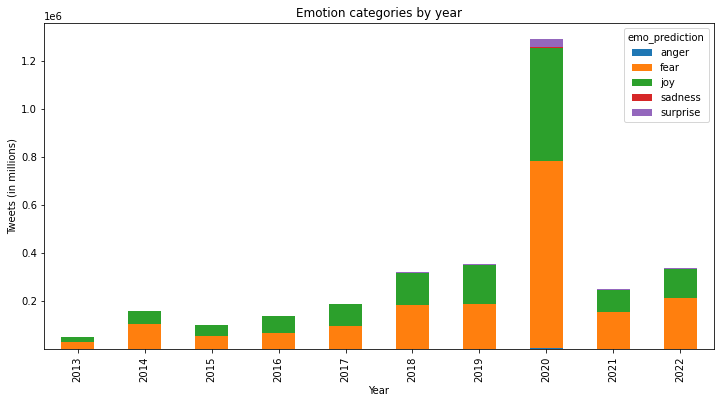

In [33]:
#Number of climate change related tweets for every year in the specified time period, also showing emotion category

df_cc_final_class_names.groupby(["year", "emo_prediction"]).size().unstack().plot(
                                                                                kind='bar', stacked=True, xlabel= "Year"
                                                                                ,ylabel = "Tweets (in millions)",
                                                                                title = "Emotion categories by year",
                                                                                figsize=(12,6))


In [34]:
#Number of climate change related tweets for every year in the specified time period

df_cc_final.groupby("year").count()

,id,text,emo_prediction
year,,,
2013,50489,50489,50489
2014,160806,160806,160806
2015,102172,102172,102172
2016,140087,140087,140087
2017,187855,187855,187855
2018,320329,320329,320329
2019,353171,353171,353171
2020,1291904,1291904,1291904
2021,250570,250570,250570


In [35]:
#df_cc_final_class_names.groupby("emo_prediction").count()

In [36]:
#Overall number and share of tweets in different emotion categories

df_cc_final_class_names2 = df_cc_final_class_names.groupby("emo_prediction").count()
df_cc_final_class_names2['Percentage'] = (df_cc_final_class_names2.text / df_cc_final_class_names2.text.sum()) * 100
df_cc_final_class_names2

,id,text,year,Percentage
emo_prediction,,,,
anger,8424,8424,8424,0.26
fear,1873962,1873962,1873962,58.62
joy,1259269,1259269,1259269,39.39
sadness,2371,2371,2371,0.07
surprise,52579,52579,52579,1.64


## b2) Climate Change data - Pearson’s chi-squared test for emotion categories

In [37]:
from scipy.stats import chi2_contingency

In [38]:
## Creating the contingency table

df_cc_final_class_names3 = df_cc_final_class_names.groupby(["year", "emo_prediction"]).count()
df_cc_final_class_names3 = df_cc_final_class_names3.drop(columns=['id'])
#df_cc_final_class_names3.unstack(level=0)

In [39]:
#Number of tweets in each emotion category over time

df_cc_final_class_names4 = df_cc_final_class_names3.unstack(level=0)
df_cc_final_class_names4

text                                                       \
year             2013    2014   2015   2016   2017    2018    2019    2020   
emo_prediction                                                               
anger              10     132    425     61     52     477     487    6342   
fear            30820  105640  55689  68338  98745  184744  186268  776699   
joy             19284   54195  45355  70702  88135  131169  163814  470849   
sadness            19      54     52     66     92     197     117    1411   
surprise          356     785    651    920    831    3742    2485   36603   

                                
year              2021    2022  
emo_prediction                  
anger               92     346  
fear            155243  211776  
joy              93042  122724  
sadness            132     231  
surprise          2061    4145

In [40]:
#Share of emotion categories over time

(100. * df_cc_final_class_names4 / df_cc_final_class_names4.sum())

text                                                      
year            2013  2014  2015  2016  2017  2018  2019  2020  2021  2022
emo_prediction                                                            
anger           0.02  0.08  0.42  0.04  0.03  0.15  0.14  0.49  0.04  0.10
fear           61.04 65.69 54.51 48.78 52.56 57.67 52.74 60.12 61.96 62.43
joy            38.19 33.70 44.39 50.47 46.92 40.95 46.38 36.45 37.13 36.18
sadness         0.04  0.03  0.05  0.05  0.05  0.06  0.03  0.11  0.05  0.07
surprise        0.71  0.49  0.64  0.66  0.44  1.17  0.70  2.83  0.82  1.22

In [41]:
#Contingency table, observed frequencies

contingency_table = df_cc_final_class_names3.unstack(level=0).to_numpy()
contingency_table

array([[    10,    132,    425,     61,     52,    477,    487,   6342,
            92,    346],
       [ 30820, 105640,  55689,  68338,  98745, 184744, 186268, 776699,
        155243, 211776],
       [ 19284,  54195,  45355,  70702,  88135, 131169, 163814, 470849,
         93042, 122724],
       [    19,     54,     52,     66,     92,    197,    117,   1411,
           132,    231],
       [   356,    785,    651,    920,    831,   3742,   2485,  36603,
          2061,   4145]], dtype=int64)

In [42]:
chi2, p, dof, ex = chi2_contingency(contingency_table)

In [43]:
#Chi-squared test results

print (chi2, p, dof)
print ("p value was significant, at ", p)

51559.28705721796 0.0 36
p value was significant, at  0.0


In [44]:
#Expected frequencies

ex

array([[1.33053454e+02, 4.23771390e+02, 2.69253451e+02, 3.69170695e+02,
        4.95053508e+02, 8.44161695e+02, 9.30710083e+02, 3.40454929e+03,
        6.60326090e+02, 8.93950340e+02],
       [2.95984231e+04, 9.42701189e+04, 5.98968110e+04, 8.21239142e+04,
        1.10127192e+05, 1.87788098e+05, 2.07041231e+05, 7.57359450e+05,
        1.46892925e+05, 1.98863838e+05],
       [1.98896118e+04, 6.33478365e+04, 4.02495874e+04, 5.51858038e+04,
        7.40035062e+04, 1.26190249e+05, 1.39128010e+05, 5.08932026e+05,
        9.87094224e+04, 1.33632948e+05],
       [3.74489244e+01, 1.19273738e+02, 7.57834678e+01, 1.03905949e+02,
        1.39336642e+02, 2.37595843e+02, 2.61955556e+02, 9.58236749e+02,
        1.85853889e+02, 2.51609242e+02],
       [8.30462672e+02, 2.64499951e+03, 1.68056472e+03, 2.30420536e+03,
        3.08991197e+03, 5.26889575e+03, 5.80909371e+03, 2.12497385e+04,
        4.12147263e+03, 5.57965515e+03]])

In [45]:
#Difference between observed frequencies and expected frequencies in percentages

array_observed_vs_expected = (contingency_table/ex) * 100
array_observed_vs_expected

array([[  7.51577633,  31.14887015, 157.84384501,  16.52352175,
         10.50391506,  56.50576218,  52.32563921, 186.28016375,
         13.93251023,  38.7046108 ],
       [104.1271687 , 112.06095977,  92.97489981,  83.21327677,
         89.66450384,  98.37897173,  89.96662129, 102.55354975,
        105.68446374, 106.49296653],
       [ 96.95513512,  85.55146161, 112.68438499, 128.11628193,
        119.09570844, 103.94543279, 117.74336465,  92.51707029,
         94.25847877,  91.8366332 ],
       [ 50.73576959,  45.27400674,  68.61654861,  63.51898083,
         66.02714045,  82.91390863,  44.66406503, 147.24962292,
         71.02353408,  91.80902811],
       [ 42.86767025,  29.67864439,  38.73697883,  39.92699679,
         26.89397008,  71.02057394,  42.77775713, 172.25153127,
         50.00639778,  74.28774524]])

In [46]:
#Dataframe version of above table

df_observed_vs_expected = pd.DataFrame(array_observed_vs_expected, columns=["2013", "2014", "2015", "2016", "2017", "2018",
                                                                            "2019", "2020", "2021", "2022"],
                                                                    index=["anger", "fear", "joy", "sadness", "surprise"])
df_observed_vs_expected

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
anger,7.52,31.15,157.84,16.52,10.50,56.51,52.33,186.28,13.93,38.70
fear,104.13,112.06,92.97,83.21,89.66,98.38,89.97,102.55,105.68,106.49
joy,96.96,85.55,112.68,128.12,119.10,103.95,117.74,92.52,94.26,91.84
sadness,50.74,45.27,68.62,63.52,66.03,82.91,44.66,147.25,71.02,91.81
surprise,42.87,29.68,38.74,39.93,26.89,71.02,42.78,172.25,50.01,74.29
